## **CS2IAI Introduction to Artificial Intelligence**

Prepaped by Dr. Farzaneh Farhadi

**Welcome! In this practical session we will learn about intelligent agents.**

Read through the notebook to see how python commands are being implemeted. Then answer the exercise questions. Your answers should be added in code cells.

**Intelligent Agents**

In this tutorial, we will learn how to develop an intelligent agent for **vacuum cleaner** problem. 

## **Creating Environment:**

Our environment is a square grid, where each cell may or may not be dirty. The size of the grid (*env_size*), the initial states of the cells (*init_status*), and the initial location of the vacuum cleaner (*init_loc*) can be determined by the user. The init_status is matrix of size (*env_size × env_size*), where the (i,j)-th element shows the dirty state of the cell in the i-th row and j-th column. Each element of init_status can take two values 0 and 1, where 0 means clean and 1 means dirty.

The figure below shows how we number rows and columns when 𝑛 = 3. We follow the same pattern for 𝑛 ≠ 3. That is, We number the rows from top to bottom and columns from left to right starting with 0.

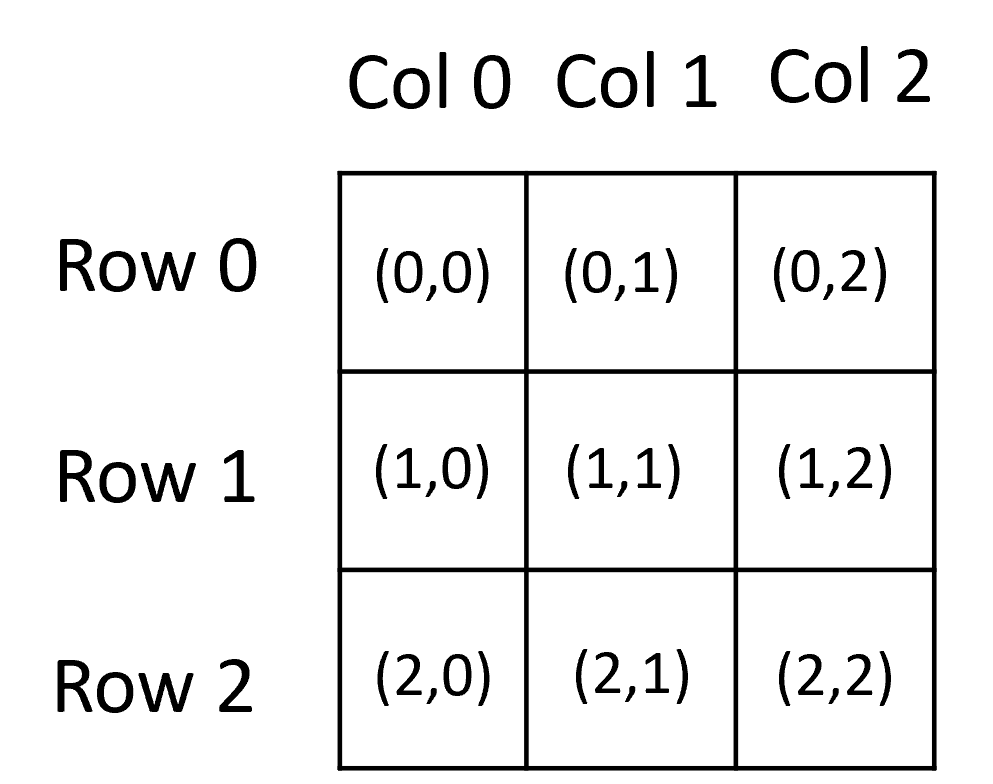

To create this environment, we need to take some inputs from the user. To this end, we use the Python built-in **input()** function. This function takes the input from the user and converts it into a string. The type of the returned object always will be <type ‘str’>. So for taking integer input we have to type cast those inputs into integers by using Python built-in **int()** function.

Run the following example to see how these two functions work. You can give any integer number (e.g., 100) as the input.

In [ ]:
# take input from user
input_a = input()
 
# print data type
print(type(input_a))
 
# type cast into integer
input_a = int(input_a)
 
# print data type
print(type(input_a))

The **input()** function has an optional parameter, commonly known as **prompt**, which is a string that will be printed on the screen whenever the function is called. The **prompt** tells the user what information they are expected to enter. When your program reaches an input command it will display the **prompt** and wait for the user to type some input. As soon as the user hits enter, their text will be stored in the variable that you assigned the input result to.

**Example:**

In [ ]:
name = input('Enter your name: ')
print(name)

age = int(input('Enter your age: '))
print(age)

Note that in the above example, we used the type conversion command **int()** to interpret the user's age as an integer quantity.

# Exercise 1

Using the above-introduced commands, complete the following function called **vacuum_world()** that takes the grid size (*env_size*), the initial dirty states of the cells (*init_status*), and the initial location of the vacuum cleaner (*init_loc*) from the user and assign them to variables with the same names. The initial location is an array of size (1,2), where the first and second components represent the row and column indicators.

Give 3 as the grid size and (0,0) as the starting location, for simplicity.


In [ ]:
import numpy as np
def vacuum_world():
    # Taking the grid size from the user and assigning it to an integer variable called env_size
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    
    # Taking the initial dirty statuses of the cells one by one, where 0 indicates Clean and 1 indicates Dirty
    # We consider a cell to be clean if its corresponding input is invalid (i.e., anything except 0 and 1)
    init_status=np.zeros((env_size,env_size))
    for i in range(0,env_size):
      for j in range(0,env_size):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ***************************************************
    
    # Taking the initial location of vacuum cleaner
    init_loc_row = int(input('Vacuum cleaner location: Row'))
    init_loc_col = int(input('Vacuum cleaner location: Column'))
    init_loc=np.array([init_loc_row,init_loc_col])
    return [env_size,init_status,init_loc]
[env_size,init_status,init_loc]=vacuum_world()

print(env_size)
print(init_status)
print(init_loc)

## **Creating Agent**

Basically, the agents may perceive the environment, and in response take certain actions.

**Actions:** The set of possible actions that an agent can take is as follows: {suck, up, down, right, left, nothing}, where:
- suck means the agent removes the dirt from its current square,
- up, down, right, left mean the agent moves in the direction of the action, and
- nothing means the agent remains in the current cell and does nothing.


**Percept:** A percept for the vacuum-agent is a list of four elements:
1. loc: a list of size 2, i.e., (locr locc), that contains the row and colum indices of the agent’s location,
2. status: 1 if the current cell contains dirt, else 0,
3. last-action: the action agent took at previous step,
4. bump: 1 if the agent has bumped into a wall, else 0.

Note that this is the only data that the agent has for making its decisions.

**Agents:** In this setting, we want to create three following agents:

1. random-vacuum_agent: This agent ignores the percept it gets and chooses actions completely at random.
2. reactive-vacuum-agent1: This agent uses the information from the percept as follows:
    - It removes the dirt if exists,
    - It takes an action different from its previous action if it bumped into a wall, and
    - It moves in a uniformly random direction, otherwise.
3. reactive-vacuum-agent2: This agent uses the information from the percept as follows:
    - It removes the dirt, if exists,
    - It moves in an opposite direction, if it bumped into a wall, and
    - It takes a random action with the following probabilities, otherwise. up: 20%, down: 40%, right: 20%, left: 20%, nothing: 0%.


To this end, we first define the set of feasible actions:

In [ ]:
actions= ['suck','up', 'down', 'right', 'left', 'nothing']

# Exercise 2

We also define a **dictionary** called **actions_move** that maps each action to its corresponding displacement array. For example, action **up** should be mapped to array [-1,0], because by doing this action, the vacuum cleaner's column index decreases by one and its row index remains constant.

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

Now, we want to create the random-vacuum-agent. To this end, we use **choice()** function from **random** module. 
The random module of python provides us several methods to generate random numbers. It also provides some methods which are used in statistics.

- random() : This function generates a random float value between 0 and 1.

Example:

In [ ]:
import random
number=random.random()
print(number) #prints a float between 0 and 1

- randint() : This function takes two integers as arguments and generates a random integer between them.

Example:

In [ ]:
number=random.randint(1,10) #both 1 and 10 are inclusive,
print(number)

- randrange() : It returns a random integer from a given range. It takes three parameters, start, stop, and step. The start is compulsory while stop and step are optional.

Example:

In [ ]:
number=random.randrange(2,10,2) # Generates a random integer between 1 and 10, 1 inclusive and 10 exclusive, step value is 2.
print(number)

- choice() : It takes a non-empty sequence as argument and selects a random value from that sequence. If you pass an empty sequence as argument, then it gives IndexError.

Example:

In [ ]:
alist=[10,20,30,40,50]
number=random.choice(alist)
print(number) #prints a randomly picked value from alist

- choices() : This method chooses multiple random items from a list or sequence. You can weigh the possibility of each result with the weights parameter. Syntax: random.choices(sequence, weights=None, k=1)

Example:

In [ ]:
alist=[10,20,30,40]
number=random.choices(alist, weights=(0,30,60,10), k=20) #Return a 20 sized list of elements chosen from the alist with replacement. Selections are made according to the relative weights.
print(number) 

# Exercise 3

Exercise 3.1: 

Use the **random.choice()** function to create the random-vacuum-agent.

In [ ]:
def random_vacuum_agent(loc,status,last_action,bump):
  # ***************************************************
  # INSERT YOUR CODE HERE
  # ***************************************************

Evaluate the following expression several times to make sure that your code generates random actions. Notice that in this expression, we pass a copy of the global variable init_status to the function. This is to make sure that the value of this global variable does not change while running the command.

In [ ]:
random_vacuum_agent([0,0],init_status.copy(),0,0)

Exercise 3.2:

Write a function called **reactive_vacuum_agent1(loc,status,last_action,bump)** that gets the percept and chooses an action based on the strategy of reactive-vacuum-agent1.

In [ ]:
def reactive_vacuum_agent1(loc,status,last_action,bump):
  if status[loc[0]][loc[1]]==1:
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
  elif bump==1:
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
  else:
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************

Test how this function works by giving it different inputs.

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************

Exercise 3.3:

Write a function called **reactive_vacuum_agent2(loc,status,last_action,bump)** that gets the percept and chooses an action based on the strategy of reactive-vacuum-agent2. 

Hints:
1. Define a dictionary that maps each action with its opposite action.
2. Think about which of the random methods introduced above is most appropriate to do this task.

In [ ]:
def reactive_vacuum_agent2(loc,status,last_action,bump):
  if status[loc[0]][loc[1]]==1:
    return 'suck'
  elif bump==1:
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
  else:
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************

## **Further Exercises:**

## **Simulator**

We want to write a code to see how each of these agents works in our environment. To this end, we need several functions:

1. **update_location(loc,action):** This function gets the agent’s current location and chosen action, and returns the agent’s next position in the grid.
2. **update_status(status,loc,action):** This function updates the status of the grid based on the agent’s current location and chosen action.
3. **simulate_vacuum_agent(status,loc,agent_program,max_step):** this function uses the above-defined functions to simulate the behaviour of an agent in the environment.


# Exercise 4

The codes of these functions are available below. However, they may have some missing parts. Fill in the missing parts to make the codes do their certain tasks.

In [ ]:
def update_location(loc,action):
  # Adding the displacement array to the current location and storing the result in an array called next_loc
  # ***************************************************
  # INSERT YOUR CODE HERE
  # ***************************************************
  bump=0
  # Checking whether next_loc is within or outside of the grid. If it is outside, it means that the agent has bumped the wall, and hence the next_loc coordinates need to be modified.
  for i in range(0,2):
    if next_loc[i] <0:
      next_loc[i]=0
      bump=1
    if next_loc[i] >env_size-1:
      next_loc[i]=env_size-1
      bump=1
  return [next_loc,bump]

Note that you cannot add arrays by using the + operator, as the + operator puts the contents of two or more arrays in a single array.

In [ ]:
def update_status(status,loc,action):
  if status[loc[0]][loc[1]]==1 and action=='suck':
    status[loc[0]][loc[1]]=0
  return status

In Python, functions can take multiple arguments and these arguments can be objects, variables(of same or different data types) and even functions. This means that we can pass functions as arguments to other functions. Functions that can accept other functions as arguments are called higher-order functions.

In the example below, a function **fun** is created which takes a function **fun1** as an argument.

In [ ]:
def fun(fun1, thing):
  return fun1(thing)

result1=fun(random.choice,[10, 5, 9, 1])
print(result1)
result2=fun(np.sort,[10, 5, 9, 1])
print(result2)

We would like to use this technique to write the **simulate_vacuum_agent**. This function takes the **agent_program** as an argument. The **agent_program** could be any function that determines the agent's strategy. So, in our scenario, it has three feasible values: **random_vacuum_agent**, **reactive_vacuum_agent1**, **reactive_vacuum_agent2**. By passing any of these inputs, the **simulate_vacuum_agent** function simulates the behavior of its that agent in our vacuum cleaner environment.

In [ ]:
def simulate_vacuum_agent(status,loc,agent_program,max_step):
  last_action='nothing'
  bump=0
  iter=0
  # While any dirt remained and we did not reach the maximum number of iterations
  while np.count_nonzero(status) > 0 and iter <max_step:
    # Defining action as the action suggested by the agent_program
    action= # INSERT YOUR CODE HERE
    [loc,bump]=update_location(loc,action)
    status=update_status(status,loc,action)
    iter+=1
    last_action=action
  return [loc,status,iter]

## **Comparing different strategies**

We now have all we need to simulate the behavior of different agents in the vacuum cleaner environment. 

To start, run the following command to see how many steps it takes for the random_agent to clear the grid.

In [ ]:
_,_,num_step=simulate_vacuum_agent(init_status.copy(),init_loc.copy(),random_vacuum_agent,1000)

As the actions are random, everytime that you run the above command the result could be different. Therefore, to obtain a more reliable result, it is better to run the above command for 1000 times and then take the average. This can be done by running the following commands.

In [ ]:
num_step=np.zeros(1000)
for i in range(0,1000):
  _,_,num_step[i]=simulate_vacuum_agent(init_status.copy(),init_loc.copy(),random_vacuum_agent,1000)
np.average(num_step)

# Exercise 5

Run a similar speed test for reactive-vacuum-agent1 and reactive-vacuum-agent2. And compare their results with random_vacuum_agent. Which agent is fastest?

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# ***************************************************